# Thematic Map

Original source: http://bcb.dfci.harvard.edu/~aedin/courses/R/CDC/maps.html

In [23]:
# load the maps package
library(maps)

# load the ggmap package
library(ggmap)

In [24]:
# create a graphic "grid" for layout purposes of 2 rows and 1 column
par(mfrow = c(2, 1))

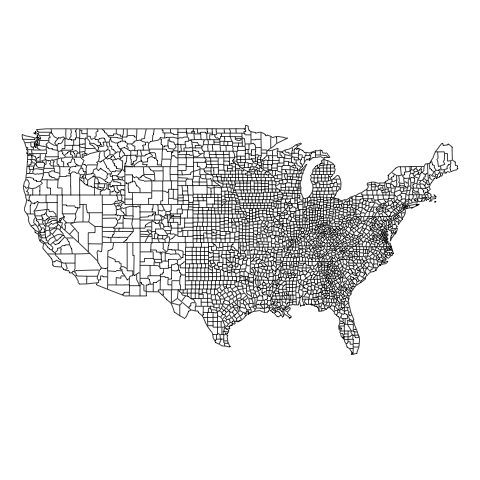

In [25]:
# load the US county map
map("county")

In [26]:
# load national unemployment data
data(unemp)

In [27]:
# load national FIPS county codes
data(county.fips)

In [28]:
# create a range of colors for the map fill
colors = c("#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043")

In [29]:
# create a colorBuckets object cutting up unemp's values into buckets according to a vector of cutpoints
unemp$colorBuckets <- as.numeric(cut(unemp$unemp, c(0, 2, 4, 6, 8, 10, 100)))

In [30]:
# match the colors in "colors" with those buckets
colorsmatched <- unemp$colorBuckets[match(county.fips$fips, unemp$fips)]

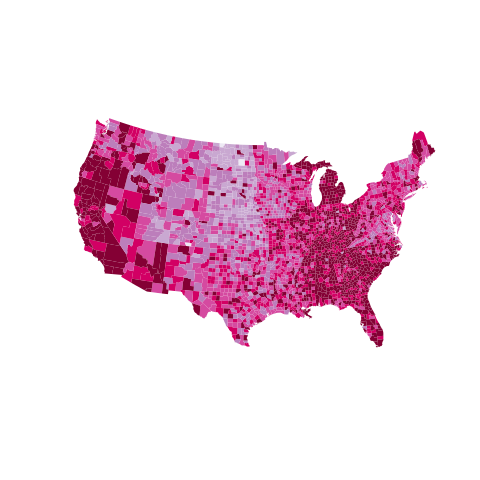

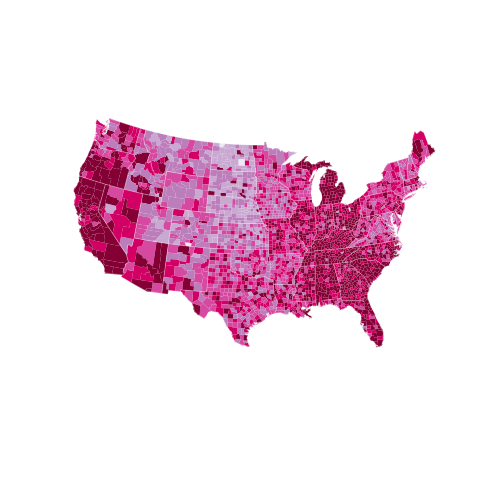

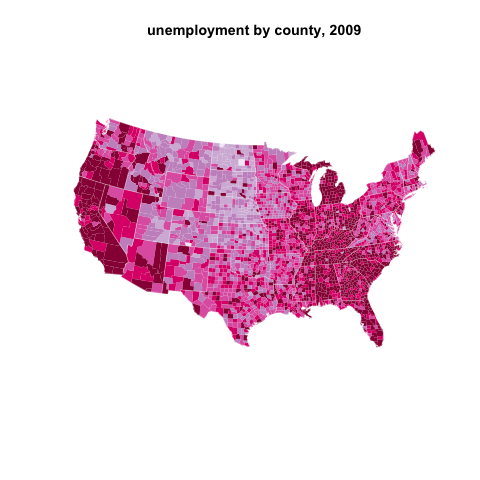

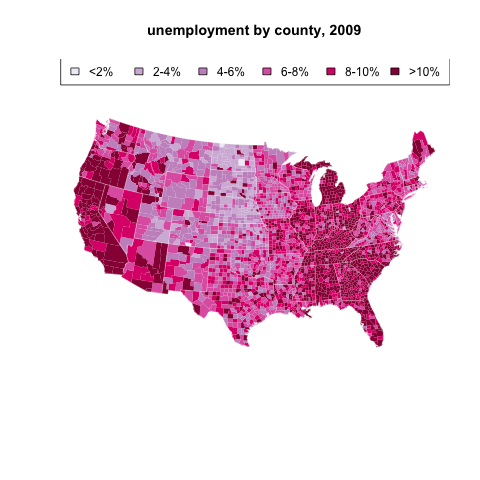

In [31]:
# create a map with colors according to the bucket colors
map("county", 
    col = colors[colorsmatched], 
    fill = TRUE, 
    resolution = 0, 
    lty = 0, 
    projection = "polyconic")

# Add border around each State
map("state", col = "white", fill = FALSE, add = TRUE, lty = 1, lwd = 0.4, 
    projection = "polyconic")
title("unemployment by county, 2009")

# add some text for a legend.
leg.txt <- c("<2%", "2-4%", "4-6%", "6-8%", "8-10%", ">10%")

# add a legend
legend("topright", leg.txt, horiz = TRUE, fill = colors)